<a href="https://colab.research.google.com/github/SuvorkinPavel/autumn_2020/blob/main/Suvorkin_Pavel_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная 1 "Restaurant revenue prediction"
##Выполннл студент группы М19-ИВТ-3
##Суворкинн Павел

# План:
## 1) Монтирование диска
## 2) Распаковка архивов
## 3) Импорт библиотек
## 4) Путь к файлам, инициализация флагов и переменных
## 5) "Знакомство с набором данных"
## 6) Очистка данных
## 7) Преобразование данных
## 8) Выявление закономерностей 
## 9) Создание категориальных признаков
## 10) Поиск корреляции
## 11) Разделение на xTrain yTrain xTest
## 12) Стандартизация данных
## 13) Создание нейросети
## 14) Обучение нейросети
## 15) Тестирование нейросети


## 1) Монтирование диска

In [1]:
# Монтирование гугл диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) Распаковка архивов

In [2]:
# На диск предварительно загружен архив с dataset
# Распаковка архива и вложенных архивов
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/restaurant-revenue-prediction.zip', 'r') as zip_ref_1:
    zip_ref_1.extractall('/content/drive/My Drive/LAB_1/')
with zipfile.ZipFile('/content/drive/My Drive/LAB_1/test.csv.zip', 'r') as zip_ref_2:
    zip_ref_2.extractall('/content/drive/My Drive/LAB_1/')
with zipfile.ZipFile('/content/drive/My Drive/LAB_1/train.csv.zip', 'r') as zip_ref_3:
    zip_ref_3.extractall('/content/drive/My Drive/LAB_1/')

## 3) Импорт библиотек

In [3]:
pip install -U keras-tuner

     |████████████████████████████████| 71kB 7.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78937 sha256=0a45a99688306bc72a8234ec1aa719f575442b8f48472df1a92257980a36e333
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=f8b74d381168f8348a33ab8836ef89239e5e86e57069466d635eecd47d96087a
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [4]:
# Импорт необходимых библиотек
%tensorflow_version 2.x
import pandas as pd
import tensorflow as tf
import tensorflow.keras
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import Model, Sequential, load_model, model_from_json
from keras.layers import Input, Dense, Flatten 
from keras.layers import Activation, Dropout
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
    

## 4) Путь к файлам, инициализация флагов и переменных

In [5]:
# Указываю путь к набору данных
ds_train_path = "/content/drive/My Drive/LAB_1/train.csv"
ds_test_path = "/content/drive/My Drive/LAB_1/test.csv"
ds_ss_path = "/content/drive/My Drive/LAB_1/sampleSubmission.csv"
model_path = "/content/drive/My Drive/LAB_1/model_"
NNdir = "/content/drive/My Drive/LAB_1/NNdir"
fit_model = True #TRUE чтобы обучить     FALSE чтобы взять готовые веса

## 5) "Знакомство с набором данных"

In [6]:
df_train = pd.read_csv(ds_train_path)
df_test = pd.read_csv(ds_test_path)
df_ss = pd.read_csv(ds_ss_path)

# Информация о train.csv
f1 = open (ds_train_path)
content1 = f1.readlines()
lines1 = np.array(content1)
num_of_instances = lines1.size
print("В наборе train.csv:", num_of_instances, " записей", df_train.shape)

# Информация о test.csv
f2 = open (ds_test_path)
content2 = f2.readlines()
lines2 = np.array(content2)
num_of_instances = lines2.size
print("В наборе test.csv:", num_of_instances, " записей", df_test.shape)

# Информация о sampleSubmission.csv
f3 = open (ds_ss_path)
content3 = f3.readlines()
lines3 = np.array(content3)
num_of_instances = lines3.size
print("В наборе sampleSubmission.csv:", num_of_instances, " записей", df_ss.shape)



В наборе train.csv: 138  записей (137, 43)
В наборе test.csv: 100001  записей (100000, 42)
В наборе sampleSubmission.csv: 100001  записей (100000, 2)


In [7]:
# Информация о наборе train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [8]:
df_train.head(10)


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,10,10,8,8,8,10,8,6.0,0,0,0,0,0,5,6,3,1,5,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,5017319.0
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5,5.0,3,4,4,3,4,2,4,1,2,1,5,4,4.0,5.0,1.0,3.0,4,5,2,2,3,5,4,4,5166635.0
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,3,5,4,4,4,4,3,4.0,0,0,0,0,0,3,5,2,4,2,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,4491607.0
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,2,1,5,5,5,1,5,5.0,1,1,2,1,4,1,1,1,1,1,4,4,4.0,2.0,2.0,3.0,4,5,5,3,4,5,4,5,4952497.0
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,4,10,10,10,10,2,10,7.5,0,0,0,0,0,25,3,3,1,10,0,0,0.0,0.0,5.0,2.5,0,0,0,0,0,0,0,0,5444227.0


In [9]:
df_test.head(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0
5,5,11/29/2007,Eskişehir,Other,FC,4,4.5,5.0,4.0,2,6,5,5,10,10,2,5,7.5,0,0,0,0,0,2,5,3,2,3,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
6,6,11/05/2008,Rize,Other,FC,4,2.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,0,0,1,0,5,5,2,2,3,2,5,0.0,0.0,1.0,3.0,3,5,4,1,2,0,0,0
7,7,12/03/2013,Ankara,Big Cities,IL,2,5.0,4.0,5.0,2,3,5,4,4,4,2,4,5.0,0,0,5,2,0,5,4,2,1,3,2,0,0.0,1.0,3.0,1.0,3,0,0,0,3,0,4,4
8,8,05/30/2006,İstanbul,Big Cities,IL,5,4.0,4.0,4.0,1,3,5,4,4,4,2,4,5.0,0,4,0,3,4,3,5,1,5,2,0,4,0.0,1.0,5.0,1.0,0,4,0,0,3,5,0,0
9,9,01/20/2012,İstanbul,Big Cities,IL,15,7.5,6.0,3.0,4,8,10,5,8,8,1,6,5.0,0,8,4,1,9,25,15,1,1,1,3,0,10.0,2.5,1.0,2.5,20,2,0,2,24,4,0,3


In [10]:
df_ss.head(10)

,Id,Prediction
0,0,4453532.6
1,1,4453532.6
2,2,4453532.6
3,3,4453532.6
4,4,4453532.6
5,5,4453532.6
6,6,4453532.6
7,7,4453532.6
8,8,4453532.6
9,9,4453532.6


## 6) Очистка данных от дубликатов и пропусков


In [11]:
# Поиск и удаление дубликатов
df_train = df_train.drop_duplicates()
df_train = df_train.dropna()
df_train.shape

(137, 43)

In [12]:
df_test = df_test.drop_duplicates()
df_test = df_test.dropna()
df_test.shape

(100000, 42)

In [13]:
# Поиск пропусков
print("Процент отсутствующих данных в наборе train")
for col in df_train.columns:
    pct_missing = np.mean(df_train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print('\n',"Процент отсутствующих данных в наборе test")
for col in df_test.columns:
    pct_missing = np.mean(df_test[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Процент отсутствующих данных в наборе train
Id - 0.0%
Open Date - 0.0%
City - 0.0%
City Group - 0.0%
Type - 0.0%
P1 - 0.0%
P2 - 0.0%
P3 - 0.0%
P4 - 0.0%
P5 - 0.0%
P6 - 0.0%
P7 - 0.0%
P8 - 0.0%
P9 - 0.0%
P10 - 0.0%
P11 - 0.0%
P12 - 0.0%
P13 - 0.0%
P14 - 0.0%
P15 - 0.0%
P16 - 0.0%
P17 - 0.0%
P18 - 0.0%
P19 - 0.0%
P20 - 0.0%
P21 - 0.0%
P22 - 0.0%
P23 - 0.0%
P24 - 0.0%
P25 - 0.0%
P26 - 0.0%
P27 - 0.0%
P28 - 0.0%
P29 - 0.0%
P30 - 0.0%
P31 - 0.0%
P32 - 0.0%
P33 - 0.0%
P34 - 0.0%
P35 - 0.0%
P36 - 0.0%
P37 - 0.0%
revenue - 0.0%

 Процент отсутствующих данных в наборе test
Id - 0.0%
Open Date - 0.0%
City - 0.0%
City Group - 0.0%
Type - 0.0%
P1 - 0.0%
P2 - 0.0%
P3 - 0.0%
P4 - 0.0%
P5 - 0.0%
P6 - 0.0%
P7 - 0.0%
P8 - 0.0%
P9 - 0.0%
P10 - 0.0%
P11 - 0.0%
P12 - 0.0%
P13 - 0.0%
P14 - 0.0%
P15 - 0.0%
P16 - 0.0%
P17 - 0.0%
P18 - 0.0%
P19 - 0.0%
P20 - 0.0%
P21 - 0.0%
P22 - 0.0%
P23 - 0.0%
P24 - 0.0%
P25 - 0.0%
P26 - 0.0%
P27 - 0.0%
P28 - 0.0%
P29 - 0.0%
P30 - 0.0%
P31 - 0.0%
P32 - 0.0%
P33 - 0.0%
P34 - 

## 7) Преобразование данных

In [14]:
# Работа с датами. вычисление времени работы ресторанов в днях
# for train data
df_train['Open Date'] = pd.to_datetime(df_train['Open Date'], format ='%m/%d/%Y')
df_train['OpenDays'] = ""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2018'], [len(df_train)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format ='%m/%d/%Y')
dateLastTrain.head()

df_train['OpenDays'] = dateLastTrain['Date'] - df_train['Open Date']
df_train['OpenDays'] = df_train['OpenDays'].astype('timedelta64[D]').astype(int)

# for test data
df_test['Open Date'] = pd.to_datetime(df_test['Open Date'], format ='%m/%d/%Y')
df_test['OpenDays'] = ""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2018'], [len(df_test)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format ='%m/%d/%Y')
dateLastTrain.head()

df_test['OpenDays'] = dateLastTrain['Date'] - df_test['Open Date']
df_test['OpenDays'] = df_test['OpenDays'].astype('timedelta64[D]').astype(int)

In [15]:
df_train.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,6743
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,3609
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,1759
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2160
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,3159


In [16]:
df_test.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2536
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2481
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1524
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,1701
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,1615


## 8) Выявление закономерностей, корреляции

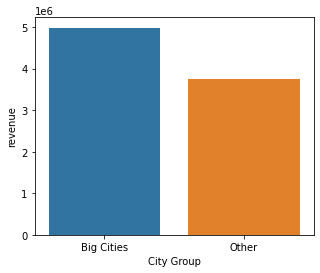

In [17]:
# Сравнение максимальной стоимости между большими городами и малыми
plt.figure(figsize=(5,4))
cityPerc = df_train[['City Group', 'revenue']].groupby(['City Group'], as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=cityPerc)

### Так мы узнали, что стоимость в больших городах больше чем в остальных городах/деревнях

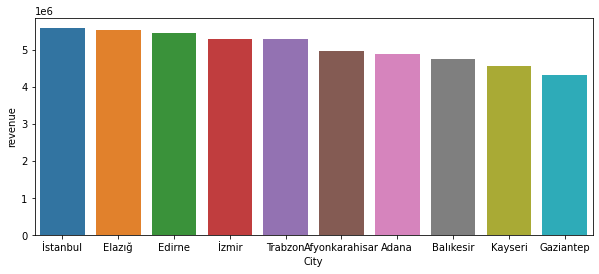

In [18]:
# Сортировка городов по максимальной стоимости ресторана
plt.figure(figsize=(10,4))
cityPerc = df_train[['City', 'revenue']].groupby(['City'], as_index=False).mean()
newDF = cityPerc.sort_values(['revenue'], ascending=False)
sns.barplot(x='City', y='revenue', data=newDF.head(10))

### ТОП 10 самых дорогих городов

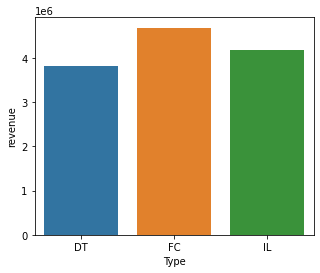

In [19]:

plt.figure(figsize=(5,4))
cityPerc = df_train[['Type', 'revenue']].groupby(['Type'], as_index=False).mean()
sns.barplot(x='Type', y='revenue', data=cityPerc)

### Выше видно, что фудкорты(FC) имеют бОльшую стоимость, чем  авто рестораны (DT) прочие забегаловки. 

{0: 'Big Cities', 1: 'Other'}


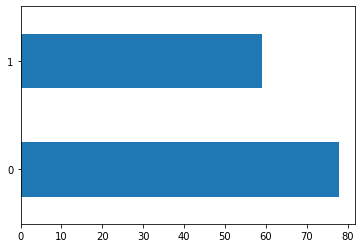

In [20]:
label_encoder = LabelEncoder()
# Train
train_lebels = pd.Series(label_encoder.fit_transform(df_train['City Group']))
train_lebels.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

{0: 'Adana', 1: 'Afyonkarahisar', 2: 'Amasya', 3: 'Ankara', 4: 'Antalya', 5: 'Aydın', 6: 'Balıkesir', 7: 'Bolu', 8: 'Bursa', 9: 'Denizli', 10: 'Diyarbakır', 11: 'Edirne', 12: 'Elazığ', 13: 'Eskişehir', 14: 'Gaziantep', 15: 'Isparta', 16: 'Karabük', 17: 'Kastamonu', 18: 'Kayseri', 19: 'Kocaeli', 20: 'Konya', 21: 'Kütahya', 22: 'Kırklareli', 23: 'Muğla', 24: 'Osmaniye', 25: 'Sakarya', 26: 'Samsun', 27: 'Tekirdağ', 28: 'Tokat', 29: 'Trabzon', 30: 'Uşak', 31: 'İstanbul', 32: 'İzmir', 33: 'Şanlıurfa'}


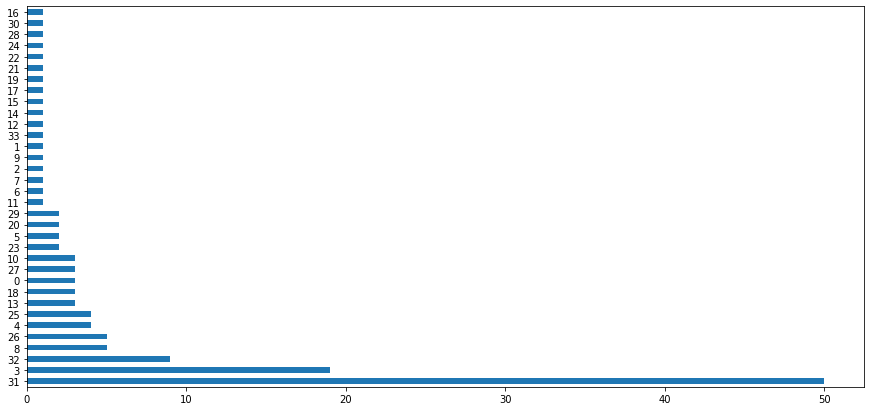

In [21]:
plt.figure(figsize=(15,7))
train_lebels = pd.Series(label_encoder.fit_transform(df_train['City']))
train_lebels.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

## Большинство ресторанов находится в 3 основных городах: 
## 3- Ankara
## 31- İstanbul 
## 32- İzmir
### Следовательно- можно сделать категориальными признаками эти города.

{0: 'Big Cities', 1: 'Other'}


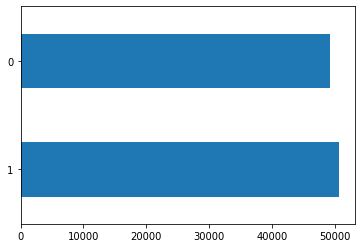

In [22]:
# Test
mapped_education = pd.Series(label_encoder.fit_transform(df_test['City Group']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

{0: 'Adana', 1: 'Afyonkarahisar', 2: 'Aksaray', 3: 'Ankara', 4: 'Antalya', 5: 'Artvin', 6: 'Aydın', 7: 'Balıkesir', 8: 'Batman', 9: 'Bilecik', 10: 'Bolu', 11: 'Bursa', 12: 'Denizli', 13: 'Diyarbakır', 14: 'Düzce', 15: 'Edirne', 16: 'Erzincan', 17: 'Erzurum', 18: 'Eskişehir', 19: 'Gaziantep', 20: 'Giresun', 21: 'Hatay', 22: 'Isparta', 23: 'Kahramanmaraş', 24: 'Kars', 25: 'Kayseri', 26: 'Kocaeli', 27: 'Konya', 28: 'Kütahya', 29: 'Kırklareli', 30: 'Kırıkkale', 31: 'Kırşehir', 32: 'Malatya', 33: 'Manisa', 34: 'Mardin', 35: 'Mersin', 36: 'Muğla', 37: 'Nevşehir', 38: 'Niğde', 39: 'Ordu', 40: 'Rize', 41: 'Sakarya', 42: 'Samsun', 43: 'Siirt', 44: 'Sivas', 45: 'Tanımsız', 46: 'Tekirdağ', 47: 'Trabzon', 48: 'Uşak', 49: 'Yalova', 50: 'Zonguldak', 51: 'Çanakkale', 52: 'Çankırı', 53: 'Çorum', 54: 'İstanbul', 55: 'İzmir', 56: 'Şanlıurfa'}


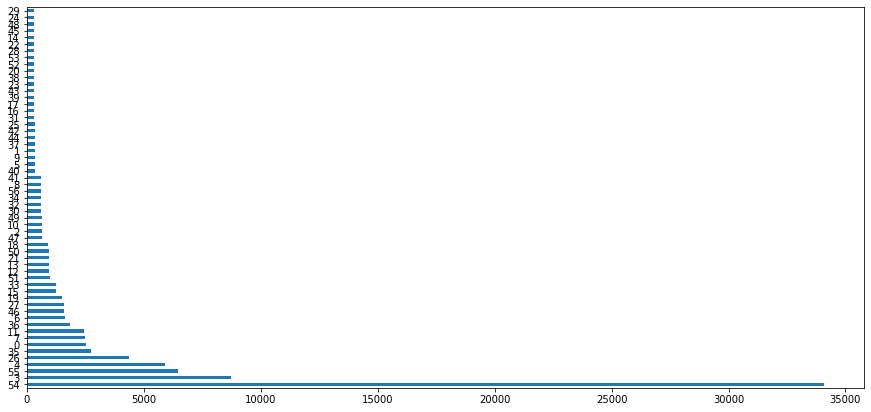

In [23]:
plt.figure(figsize=(15,7))
test_lebels = pd.Series(label_encoder.fit_transform(df_test['City']))
test_lebels.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

##3: 'Ankara'
##54: 'İstanbul', 
##55: 'İzmir'

In [24]:
df_train['City'].value_counts(dropna=False)

İstanbul          50
Ankara            19
İzmir              9
Samsun             5
Bursa              5
Sakarya            4
Antalya            4
Kayseri            3
Adana              3
Tekirdağ           3
Eskişehir          3
Diyarbakır         3
Konya              2
Aydın              2
Muğla              2
Trabzon            2
Karabük            1
Tokat              1
Edirne             1
Balıkesir          1
Denizli            1
Uşak               1
Şanlıurfa          1
Isparta            1
Kütahya            1
Amasya             1
Kocaeli            1
Bolu               1
Afyonkarahisar     1
Kastamonu          1
Gaziantep          1
Elazığ             1
Kırklareli         1
Osmaniye           1
Name: City, dtype: int64

## 9) Создание категориальных признаков

In [25]:
df_train['City'] = df_train['City'].map({'İstanbul' : 0, 'Ankara' : 1, 'İzmir' : 2, 'Antalya': 3, 'Kocaeli' : 4,
 'Samsun' : 5,  'Bursa': 5, 'Sakarya': 5, 'Eskişehir': 5, 'Adana': 5, 'Tekirdağ' : 5, 'Diyarbakır' : 5, 'Kayseri' : 5,
  'Muğla' : 5, 'Konya' : 5, 'Trabzon' : 5, 'Aydın' : 5, 'Osmaniye' : 5, 'Tokat' : 5, 'Uşak' : 5, 'Elazığ' : 5,             
'Kırklareli': 5, 'Bolu': 5,  'Edirne': 5, 'Amasya': 5, 'Isparta': 5, 'Kastamonu': 5, 'Denizli': 5, 'Karabük': 5, 
 'Şanlıurfa': 5, 'Afyonkarahisar': 5, 'Balıkesir': 5, 'Gaziantep': 5, 'Kütahya': 5})

## Кодирование городов
###'İstanbul' : 0, 
###'Ankara' : 1, 
###'İzmir' : 2, 
###'Antalya': 3, 
###'Kocaeli' : 4,
### Остальные города : 5,

In [26]:
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,6743
1,1,2008-02-14,1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,3609
2,2,2013-03-09,5,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,1759
3,3,2012-02-02,5,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2160
4,4,2009-05-09,5,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,3159


In [27]:
df_test['City'].value_counts(dropna=False)

İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Batman              604
Sakarya             604
Rize                345
Artvin              344
Bilecik             339
Afyonkarahisar      331
Nevşehir            328
Sivas               326
Samsun              324
Kayseri             323
Kırşehir            319
Erzincan        

In [28]:
df_test['City'] = df_test['City'].map({'İstanbul' : 0, 'Ankara' : 1, 'İzmir' : 2, 'Antalya': 3, 'Kocaeli' : 4,
 'Samsun' : 5,  'Bursa': 5, 'Sakarya': 5, 'Eskişehir': 5, 'Adana': 5, 'Tekirdağ' : 5, 'Diyarbakır' : 5, 'Kayseri' : 5,
  'Muğla' : 5, 'Konya' : 5, 'Trabzon' : 5, 'Aydın' : 5,  'Uşak' : 5,              
'Kırklareli': 5, 'Bolu': 5,  'Edirne': 5, 'Isparta': 5,  
 'Şanlıurfa': 5, 'Afyonkarahisar': 5, 'Balıkesir': 5, 'Gaziantep': 5, 'Kütahya': 5, 'Mersin' : 5,          
'Manisa': 5,  'Çanakkale': 5, 'Hatay': 5,  'Zonguldak': 5,'Aksaray' : 5, 'Yalova': 5,              
'Kırıkkale': 5,'Malatya' : 5, 'Mardin': 5, 'Batman': 5, 'Rize': 5, 'Artvin': 5, 'Bilecik' : 5,            
'Nevşehir': 5, 'Sivas': 5, 'Kırşehir' : 5,  'Erzincan' : 5, 'Ordu' : 5,  'Erzurum': 5,  'Kahramanmaraş': 5, 'Siirt': 5,               
'Giresun': 5,  'Niğde' : 5, 'Çankırı': 5, 'Çorum': 5, 'Düzce' : 5, 'Tanımsız' : 5,'Kars': 5})


In [29]:
df_test.head(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
0,0,2011-01-22,5.0,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2536
1,1,2011-03-18,5.0,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2481
2,2,2013-10-30,1.0,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1524
3,3,2013-05-06,4.0,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,1701
4,4,2013-07-31,5.0,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,1615
5,5,2007-11-29,5.0,Other,FC,4,4.5,5.0,4.0,2,6,5,5,10,10,2,5,7.5,0,0,0,0,0,2,5,3,2,3,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,3686
6,6,2008-11-05,5.0,Other,FC,4,2.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,0,0,1,0,5,5,2,2,3,2,5,0.0,0.0,1.0,3.0,3,5,4,1,2,0,0,0,3344
7,7,2013-12-03,1.0,Big Cities,IL,2,5.0,4.0,5.0,2,3,5,4,4,4,2,4,5.0,0,0,5,2,0,5,4,2,1,3,2,0,0.0,1.0,3.0,1.0,3,0,0,0,3,0,4,4,1490
8,8,2006-05-30,0.0,Big Cities,IL,5,4.0,4.0,4.0,1,3,5,4,4,4,2,4,5.0,0,4,0,3,4,3,5,1,5,2,0,4,0.0,1.0,5.0,1.0,0,4,0,0,3,5,0,0,4234
9,9,2012-01-20,0.0,Big Cities,IL,15,7.5,6.0,3.0,4,8,10,5,8,8,1,6,5.0,0,8,4,1,9,25,15,1,1,1,3,0,10.0,2.5,1.0,2.5,20,2,0,2,24,4,0,3,2173


In [30]:
# создание категориальных признаков для 'City Group', 'Type', 'Open Date'
cityGroup = pd.get_dummies(df_train['City Group'])
df_train = df_train.join(cityGroup)
Type = pd.get_dummies(df_train['Type'])
df_train = df_train.join(Type)
City = pd.get_dummies(df_train['City'])
df_train = df_train.join(City)
df_train = df_train.drop(['City Group', 'Type', 'Open Date', 'City'], axis=1)
print('Результат преобразований: ')
df_train.head(5)

Результат преобразований: 


,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Big Cities,Other,DT,FC,IL,0,1,2,3,4,5
0,0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,6743,1,0,0,0,1,1,0,0,0,0,0
1,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,3609,1,0,0,1,0,0,1,0,0,0,0
2,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,1759,0,1,0,0,1,0,0,0,0,0,1
3,3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2160,0,1,0,0,1,0,0,0,0,0,1
4,4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,3159,0,1,0,0,1,0,0,0,0,0,1


In [31]:
cityGroup = pd.get_dummies(df_test['City Group'])
df_test = df_test.join(cityGroup)
Type = pd.get_dummies(df_test['Type'])
df_test = df_test.join(Type)
City = pd.get_dummies(df_test['City'])
df_test = df_test.join(City)
df_test = df_test.drop(['City Group', 'Type', 'Open Date', 'City'], axis=1)
df_test.head(5)

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays,Big Cities,Other,DT,FC,IL,MB,0.0,1.0,2.0,3.0,4.0,5.0
0,0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2536,0,1,0,1,0,0,0,0,0,0,0,1
1,1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2481,0,1,0,0,1,0,0,0,0,0,0,1
2,2,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1524,1,0,0,1,0,0,0,1,0,0,0,0
3,3,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,1701,0,1,0,0,1,0,0,0,0,0,1,0
4,4,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,1615,0,1,0,1,0,0,0,0,0,0,0,1


In [32]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   P1          137 non-null    int64  
 2   P2          137 non-null    float64
 3   P3          137 non-null    float64
 4   P4          137 non-null    float64
 5   P5          137 non-null    int64  
 6   P6          137 non-null    int64  
 7   P7          137 non-null    int64  
 8   P8          137 non-null    int64  
 9   P9          137 non-null    int64  
 10  P10         137 non-null    int64  
 11  P11         137 non-null    int64  
 12  P12         137 non-null    int64  
 13  P13         137 non-null    float64
 14  P14         137 non-null    int64  
 15  P15         137 non-null    int64  
 16  P16         137 non-null    int64  
 17  P17         137 non-null    int64  
 18  P18         137 non-null    int64  
 19  P19         137 non-null    i

In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   P1          100000 non-null  int64  
 2   P2          100000 non-null  float64
 3   P3          100000 non-null  float64
 4   P4          100000 non-null  float64
 5   P5          100000 non-null  int64  
 6   P6          100000 non-null  int64  
 7   P7          100000 non-null  int64  
 8   P8          100000 non-null  int64  
 9   P9          100000 non-null  int64  
 10  P10         100000 non-null  int64  
 11  P11         100000 non-null  int64  
 12  P12         100000 non-null  int64  
 13  P13         100000 non-null  float64
 14  P14         100000 non-null  int64  
 15  P15         100000 non-null  int64  
 16  P16         100000 non-null  int64  
 17  P17         100000 non-null  int64  
 18  P18         100000 non-null  int64  
 19  P19

### Как видно в тест нет признака revenue, но также 50 столбцов! Всё потому, что помимо DT FC IL в тест добавился MB. Авто рестораны. как обученная сеть будет предсказывать по этому признаку? Никак. Он ей не известен, т.к. в трэйн его не было. Придётся добавить этот признак в тренировочную выборку. 

In [34]:
zero = []
for i in df_train.index:
    zero.insert(i, 0)
df_train.insert(45, "MB", zero, True)

In [35]:
df_train.head()


,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Big Cities,Other,DT,FC,IL,MB,0,1,2,3,4,5
0,0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,6743,1,0,0,0,1,0,1,0,0,0,0,0
1,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,3609,1,0,0,1,0,0,0,1,0,0,0,0
2,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,1759,0,1,0,0,1,0,0,0,0,0,0,1
3,3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2160,0,1,0,0,1,0,0,0,0,0,0,1
4,4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,3159,0,1,0,0,1,0,0,0,0,0,0,1


In [36]:
# переименование новых столбцов (0 - 5):
df_train.rename(columns={0:'Istanbul', 1: 'Ankara', 2: 'Izmir', 3: 'Antalya', 4: 'Kocaeli', 5: 'Other Cities'}, inplace=True)
df_test.rename(columns={0.0:'Istanbul', 1.0: 'Ankara', 2.0: 'Izmir', 3.0: 'Antalya', 4.0: 'Kocaeli', 5.0: 'Other Cities'}, inplace=True)
print(df_train)

      Id  P1   P2   P3   P4  ...  Ankara  Izmir  Antalya  Kocaeli  Other Cities
0      0   4  5.0  4.0  4.0  ...       0      0        0        0             0
1      1   4  5.0  4.0  4.0  ...       1      0        0        0             0
2      2   2  4.0  2.0  5.0  ...       0      0        0        0             1
3      3   6  4.5  6.0  6.0  ...       0      0        0        0             1
4      4   3  4.0  3.0  4.0  ...       0      0        0        0             1
..   ...  ..  ...  ...  ...  ...     ...    ...      ...      ...           ...
132  132   2  3.0  3.0  5.0  ...       0      0        0        0             1
133  133   4  5.0  4.0  4.0  ...       0      1        0        0             0
134  134   3  4.0  4.0  4.0  ...       0      0        0        0             1
135  135   4  5.0  4.0  5.0  ...       0      0        0        0             0
136  136   4  5.0  3.0  5.0  ...       0      0        0        0             0

[137 rows x 52 columns]


## 10) Поиск корреляции

                    P1        P2        P3  ...   Antalya   Kocaeli  Other Cities
P1            1.000000  0.836671  0.695928  ... -0.060679  0.147425     -0.266769
P2            0.836671  1.000000  0.473551  ... -0.104414  0.090401     -0.406469
P3            0.695928  0.473551  1.000000  ...  0.157222  0.140265     -0.161865
P4            0.677941  0.540322  0.443606  ...  0.000469  0.137821     -0.200619
P5            0.302820  0.203003  0.168891  ... -0.001050  0.141780     -0.004885
P6            0.747296  0.673106  0.570486  ...  0.052386  0.025902     -0.444745
P7            0.853753  0.769842  0.651489  ... -0.069975  0.171492     -0.201439
P8            0.760820  0.505116  0.689173  ...  0.149535  0.131822     -0.147432
P9            0.765743  0.481635  0.741967  ...  0.194924  0.213648     -0.122921
P10           0.795885  0.498135  0.764191  ...  0.142346  0.210131     -0.084461
P11           0.542735  0.442719  0.417752  ...  0.044383  0.213372     -0.174101
P12           0.

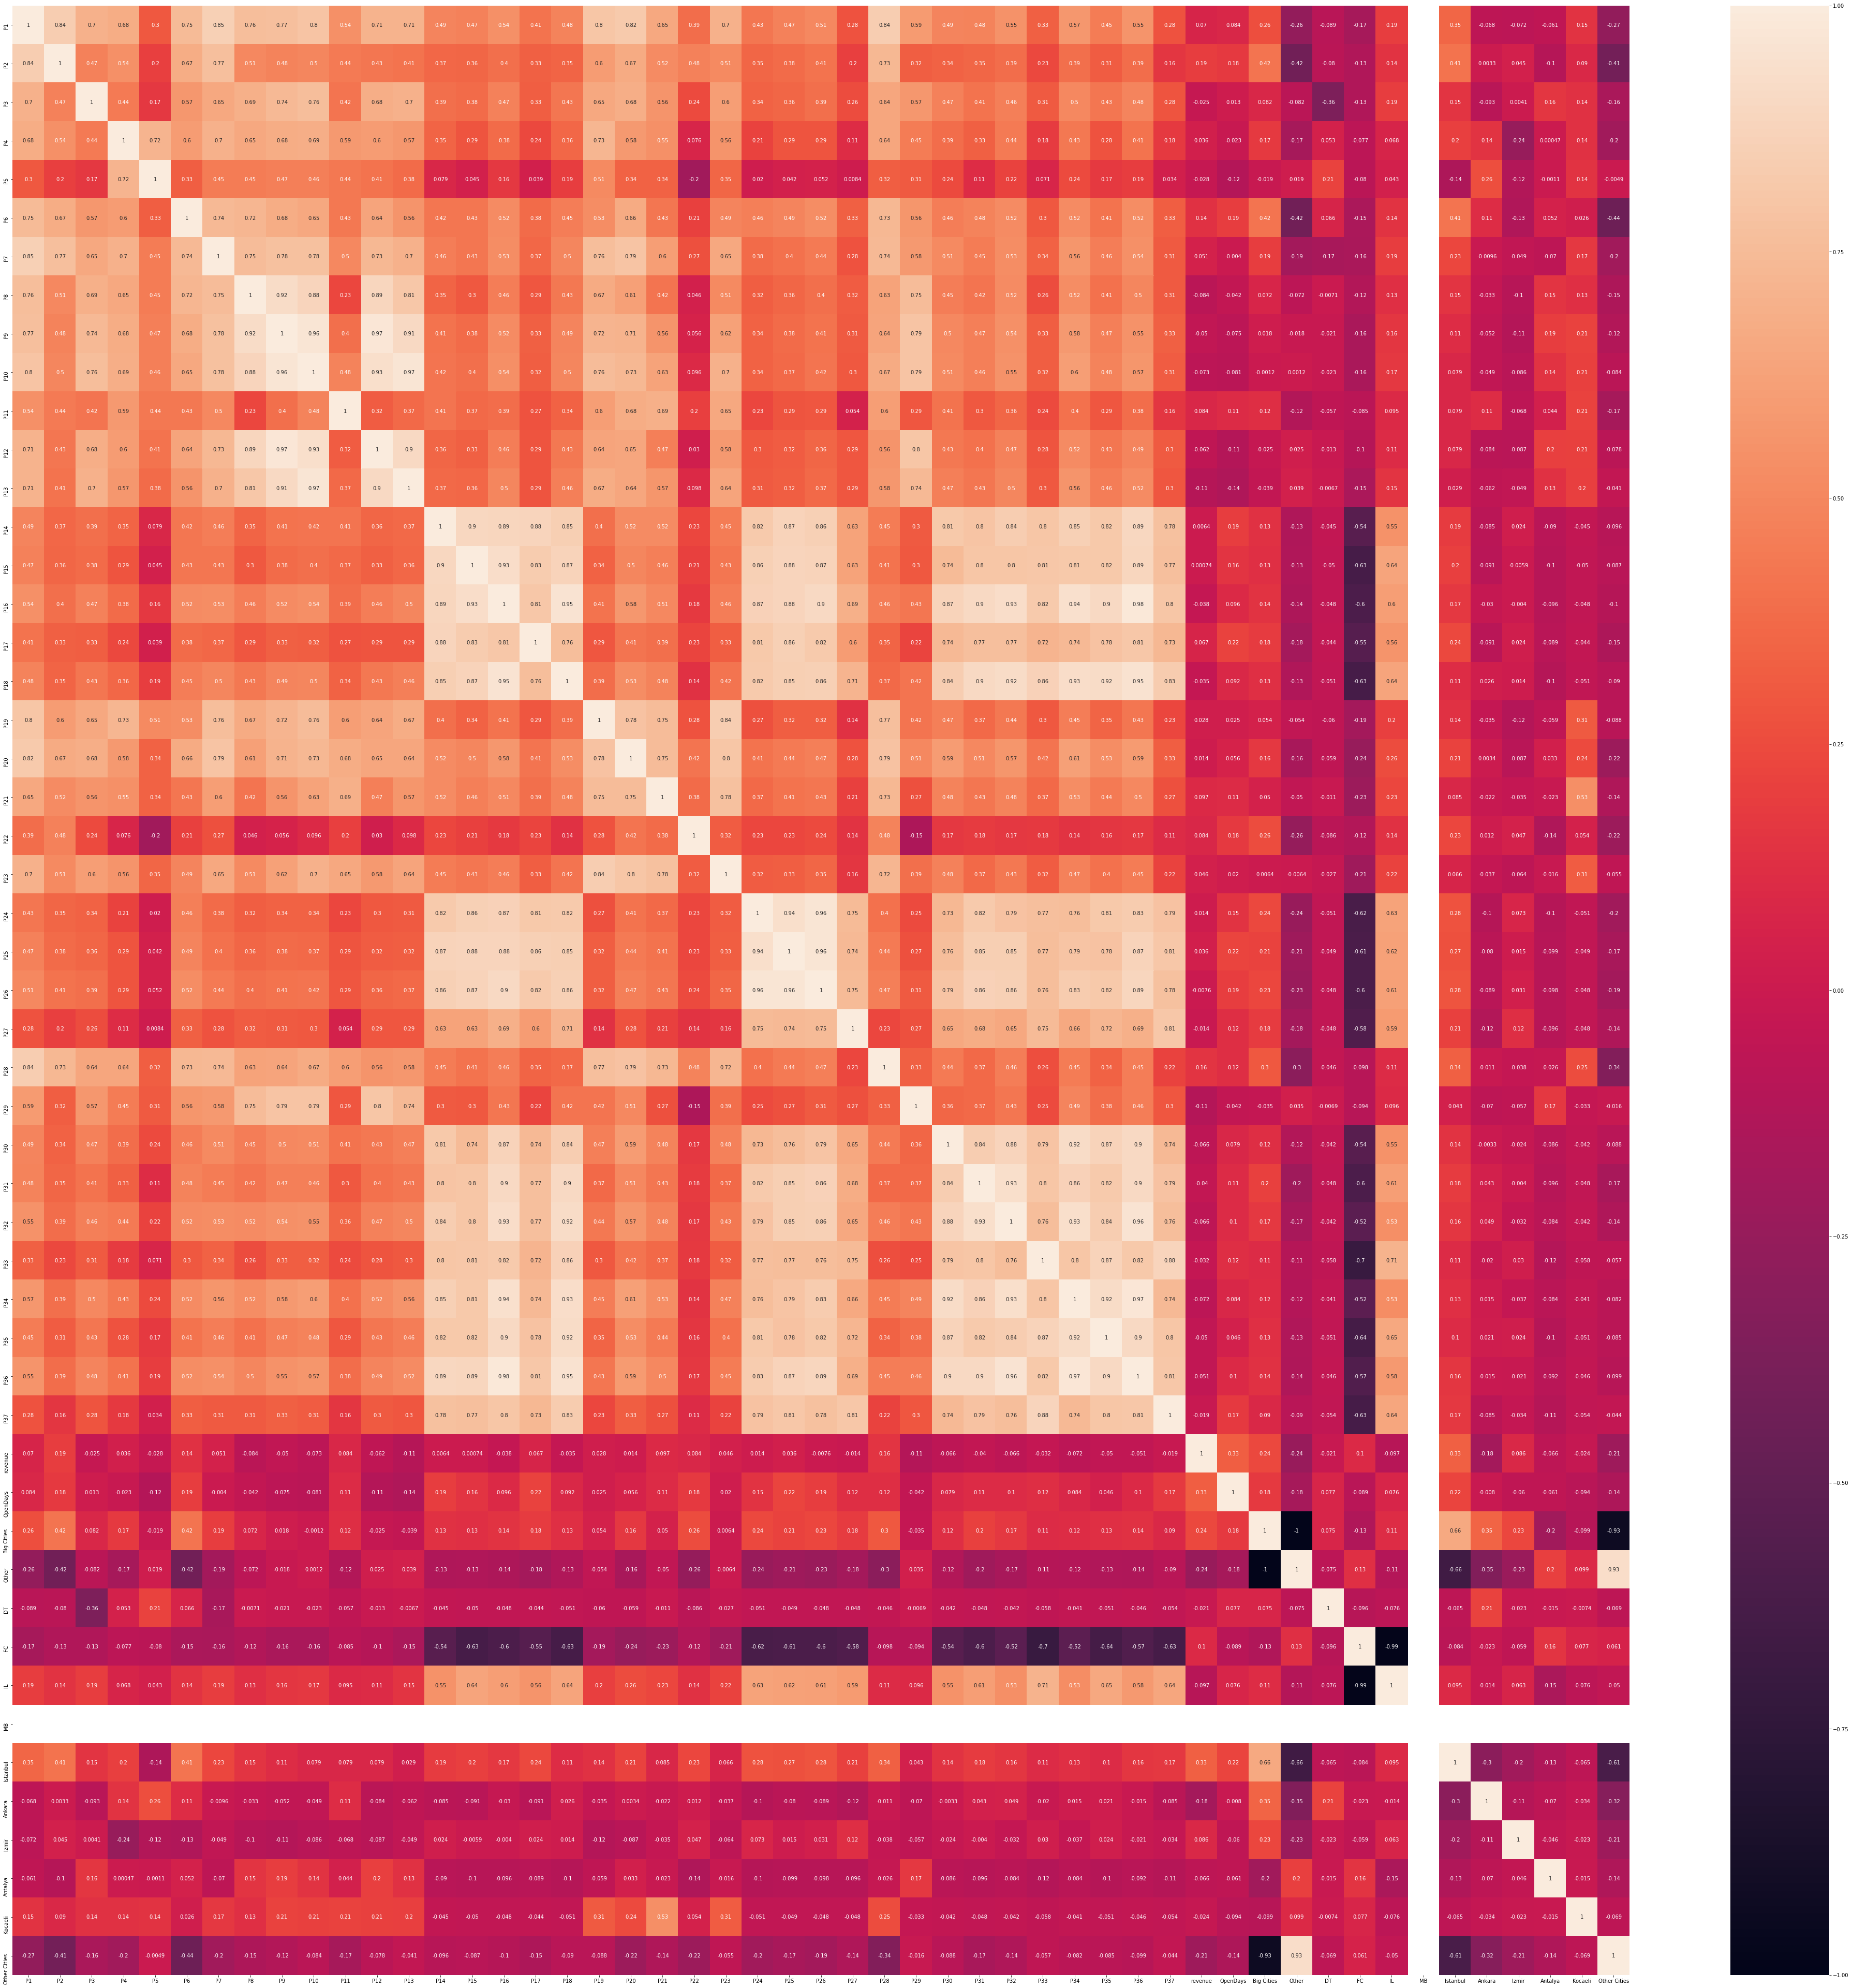

In [37]:
correlation = df_train.corr()
corr_matrix = df_train.drop(['Id',], axis=1).corr()
plt.figure(figsize=(70, 70))
sns.heatmap(corr_matrix, annot=True)
print(corr_matrix)

### P10 коррелирует с Р9 и Р13 на 96% и 97% соответрственно
### Р36 коррелирует одновременно с Р16, Р18, Р32, Р34, на 98% 95% 96% 97% соответственно
### Р26 коррелирует с Р24 и Р25 на 96%
### Поэтому оставляю Р10, Р36, Р26, а остальные из выше перечисленных убираю из наборов

                    Id        P1        P2  ...   Antalya   Kocaeli  Other Cities
Id            1.000000 -0.026351 -0.036991  ...  0.026311 -0.125759      0.109533
P1           -0.026351  1.000000  0.836671  ... -0.060679  0.147425     -0.266769
P2           -0.036991  0.836671  1.000000  ... -0.104414  0.090401     -0.406469
P3           -0.025033  0.695928  0.473551  ...  0.157222  0.140265     -0.161865
P4           -0.001914  0.677941  0.540322  ...  0.000469  0.137821     -0.200619
P5            0.010108  0.302820  0.203003  ... -0.001050  0.141780     -0.004885
P6           -0.025953  0.747296  0.673106  ...  0.052386  0.025902     -0.444745
P7           -0.080977  0.853753  0.769842  ... -0.069975  0.171492     -0.201439
P8           -0.052129  0.760820  0.505116  ...  0.149535  0.131822     -0.147432
P10          -0.028977  0.795885  0.498135  ...  0.142346  0.210131     -0.084461
P11           0.013573  0.542735  0.442719  ...  0.044383  0.213372     -0.174101
P12          -0.

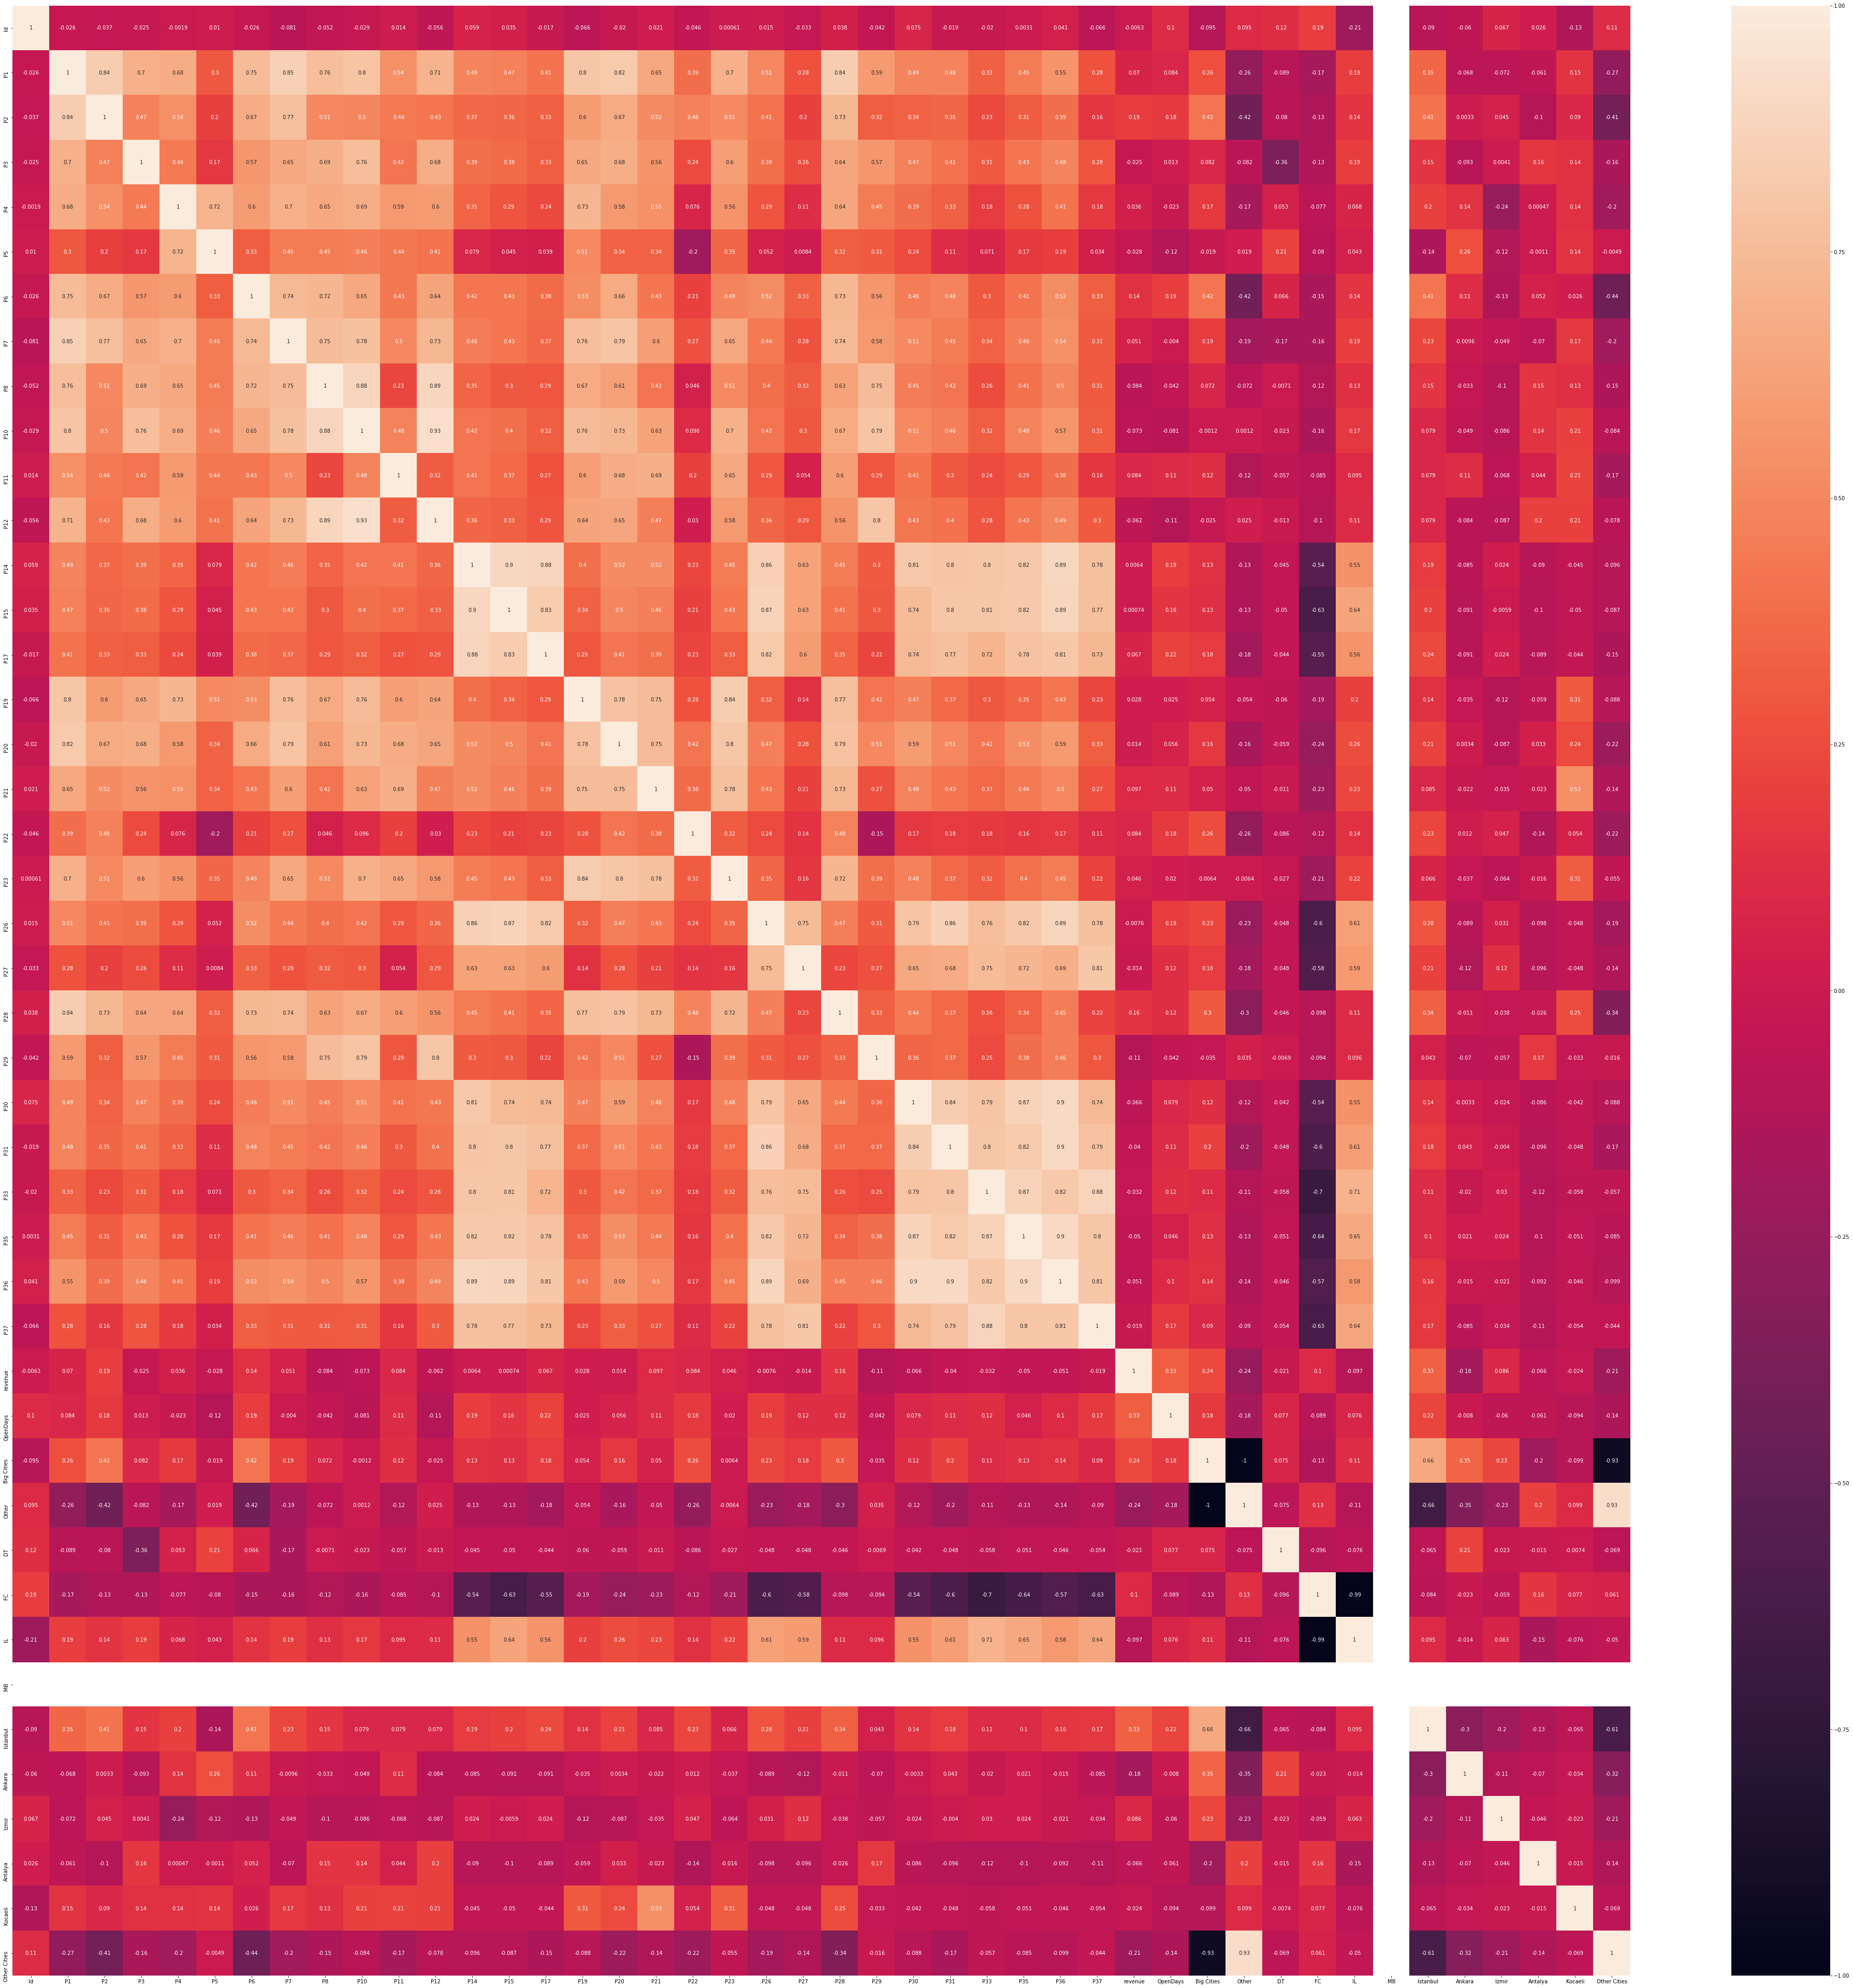

In [38]:

df_train_ready = df_train.drop(['P13','P9', 'P16', 'P18', 'P32', 'P34','P24', 'P25'], axis=1)
df_test = df_test.drop(['P13','P9', 'P16', 'P18', 'P32', 'P34','P24', 'P25'], axis=1)
corr_matrix = df_train_ready.corr()
plt.figure(figsize=(70, 70))
sns.heatmap(corr_matrix, annot=True)
print(corr_matrix)

### далее идёт нахождение корреляции признаков по отношению к целевому признаку(revenue). Необходимо убрать признаки, которые совершенно не коррелируют(<1%) с revenue. Таких признаков оказалось два.

In [39]:
corr_matrix['revenue'].sort_values(ascending=False)

revenue         1.000000
Istanbul        0.332072
OpenDays        0.325821
Big Cities      0.237403
P2              0.191518
P28             0.155534
P6              0.139094
FC              0.100211
P21             0.097411
Izmir           0.086166
P11             0.084247
P22             0.083562
P1              0.070217
P17             0.067137
P7              0.051165
P23             0.045507
P4              0.035685
P19             0.027984
P20             0.014147
P14             0.006441
P15             0.000742
Id             -0.006277
P26            -0.007650
P27            -0.013680
P37            -0.019051
DT             -0.021500
Kocaeli        -0.023667
P3             -0.024613
P5             -0.028191
P33            -0.032426
P31            -0.040418
P35            -0.050156
P36            -0.050534
P12            -0.062193
Antalya        -0.065681
P30            -0.066203
P10            -0.073220
P8             -0.084215
IL             -0.096696
P29            -0.114846


### P14 и P15 слабо коррелируют с признаком revenue (менее 1%)- следовательно эти признаки можно исключить из обучаещей и тестовой выборки.


In [40]:
df_train_ready = df_train_ready.drop(['P14', 'P15'], axis=1)
df_test = df_test.drop(['P14', 'P15'], axis=1)


In [41]:
df_train_ready.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            137 non-null    int64  
 1   P1            137 non-null    int64  
 2   P2            137 non-null    float64
 3   P3            137 non-null    float64
 4   P4            137 non-null    float64
 5   P5            137 non-null    int64  
 6   P6            137 non-null    int64  
 7   P7            137 non-null    int64  
 8   P8            137 non-null    int64  
 9   P10           137 non-null    int64  
 10  P11           137 non-null    int64  
 11  P12           137 non-null    int64  
 12  P17           137 non-null    int64  
 13  P19           137 non-null    int64  
 14  P20           137 non-null    int64  
 15  P21           137 non-null    int64  
 16  P22           137 non-null    int64  
 17  P23           137 non-null    int64  
 18  P26           137 non-null    

In [42]:
df_test.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P10,P11,P12,P17,P19,P20,P21,P22,P23,P26,P27,P28,P29,P30,P31,P33,P35,P36,P37,OpenDays,Big Cities,Other,DT,FC,IL,MB,Istanbul,Ankara,Izmir,Antalya,Kocaeli,Other Cities
0,0,1,4.0,4.0,4.0,1,2,5,4,5,5,3,2,5,5,3,1,4,0.0,0.0,2.0,3.0,0,0,0,0,0,0,2536,0,1,0,1,0,0,0,0,0,0,0,1
1,1,3,4.0,4.0,4.0,2,2,5,3,4,2,4,0,5,5,3,2,1,0.0,0.0,1.0,3.0,0,0,0,0,0,0,2481,0,1,0,0,1,0,0,0,0,0,0,1
2,2,3,4.0,4.0,4.0,2,2,5,4,5,4,5,0,5,5,5,5,5,0.0,0.0,2.0,3.0,0,0,0,0,0,0,1524,1,0,0,1,0,0,0,1,0,0,0,0
3,3,2,4.0,4.0,4.0,2,3,5,4,4,3,4,0,4,4,3,2,2,0.0,0.0,2.0,3.0,0,4,0,0,0,0,1701,0,1,0,0,1,0,0,0,0,0,1,0
4,4,2,4.0,4.0,4.0,1,2,5,4,4,3,5,0,1,5,3,1,1,0.0,0.0,5.0,3.0,0,0,0,0,0,0,1615,0,1,0,1,0,0,0,0,0,0,0,1


In [43]:
# Показатель для средней абсолютной ошибки. 

def performance_metric(y_true, y_predict):
    """ Вычисляет и возвращает оценку производительности между
        истинными и прогнозируемыми значениями на основе выбранной метрики. """
    
    mae = mean_absolute_error(y_true, y_predict)
    return mae

## 11) Разделение на train test

In [44]:
y = df_train_ready['revenue']
x = df_train_ready.drop(['revenue'], axis = 1)
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.1, random_state = 0)

xPredict = df_test

xTrain = xTrain.drop(['Id'],axis=1)
xTest = xTest.drop(['Id'],axis=1)

In [45]:
xTrain.head(15)

,P1,P2,P3,P4,P5,P6,P7,P8,P10,P11,P12,P17,P19,P20,P21,P22,P23,P26,P27,P28,P29,P30,P31,P33,P35,P36,P37,OpenDays,Big Cities,Other,DT,FC,IL,MB,Istanbul,Ankara,Izmir,Antalya,Kocaeli,Other Cities
62,2,4.0,4.0,4.0,2,3,5,5,4,2,5,2,3,1,1,1,1,3.0,1.0,2.0,3.0,1,1,2,1,3,3,2604,0,1,0,1,0,0,0,0,0,0,0,1
115,6,4.5,6.0,6.0,4,8,10,10,10,4,10,6,5,9,3,2,5,10.0,12.5,5.0,7.5,25,15,4,12,16,8,2068,1,0,0,0,1,0,1,0,0,0,0,0
114,4,5.0,5.0,4.0,2,2,5,4,5,3,5,1,5,5,4,5,5,3.0,2.0,4.0,1.0,5,3,2,4,3,1,3313,0,1,0,0,1,0,0,0,0,0,0,1
122,12,7.5,6.0,7.5,2,8,10,8,8,10,6,6,25,15,9,5,15,10.0,5.0,12.5,2.5,25,15,6,3,16,6,7571,1,0,0,0,1,0,1,0,0,0,0,0
104,4,5.0,4.0,3.0,1,3,5,5,5,2,5,1,2,5,1,3,4,4.0,3.0,2.0,3.0,5,5,3,4,3,2,3997,0,1,0,0,1,0,0,0,0,0,0,1
84,4,4.0,5.0,3.0,1,3,5,5,5,2,5,1,1,3,2,2,3,3.0,5.0,2.0,3.0,4,3,2,4,3,1,3006,1,0,0,0,1,0,0,0,1,0,0,0
60,12,7.5,6.0,6.0,2,6,10,8,10,6,10,3,10,15,6,3,10,5.0,2.5,5.0,7.5,10,15,4,12,12,2,2071,1,0,0,0,1,0,0,1,0,0,0,0
18,4,5.0,4.0,3.0,1,2,5,5,5,2,5,2,4,5,1,4,2,3.0,3.0,2.0,3.0,3,5,4,4,3,2,2081,1,0,0,0,1,0,0,0,1,0,0,0
92,12,7.5,7.5,6.0,2,10,10,8,10,8,8,0,25,15,6,3,25,0.0,0.0,10.0,7.5,0,0,0,0,0,0,5540,1,0,0,1,0,0,1,0,0,0,0,0
33,2,3.0,4.0,4.0,2,2,5,5,5,1,5,0,3,1,1,2,1,0.0,0.0,2.0,3.0,0,0,0,0,0,0,1714,0,1,0,1,0,0,0,0,0,0,0,1


In [46]:
yTrain.head()

62     5286212.0
115    4882985.0
114    4155435.0
122    4286645.0
104    4467728.0
Name: revenue, dtype: float64

In [47]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 26 to 27
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P1            14 non-null     int64  
 1   P2            14 non-null     float64
 2   P3            14 non-null     float64
 3   P4            14 non-null     float64
 4   P5            14 non-null     int64  
 5   P6            14 non-null     int64  
 6   P7            14 non-null     int64  
 7   P8            14 non-null     int64  
 8   P10           14 non-null     int64  
 9   P11           14 non-null     int64  
 10  P12           14 non-null     int64  
 11  P17           14 non-null     int64  
 12  P19           14 non-null     int64  
 13  P20           14 non-null     int64  
 14  P21           14 non-null     int64  
 15  P22           14 non-null     int64  
 16  P23           14 non-null     int64  
 17  P26           14 non-null     float64
 18  P27           14 non-null     f

In [48]:
xTest.head(20)

,P1,P2,P3,P4,P5,P6,P7,P8,P10,P11,P12,P17,P19,P20,P21,P22,P23,P26,P27,P28,P29,P30,P31,P33,P35,P36,P37,OpenDays,Big Cities,Other,DT,FC,IL,MB,Istanbul,Ankara,Izmir,Antalya,Kocaeli,Other Cities
26,3,5.0,4.0,5.0,2,3,5,3,4,5,5,1,5,5,2,3,2,2.0,1.0,3.0,3.0,5,5,3,4,3,1,2869,1,0,0,0,1,0,0,1,0,0,0,0
8,1,1.0,4.0,4.0,1,2,1,5,5,1,5,1,1,1,1,1,1,4.0,2.0,2.0,3.0,4,5,3,5,4,5,2683,0,1,0,0,1,0,0,0,0,0,0,1
86,3,3.0,4.0,4.0,2,2,5,4,5,3,5,0,3,5,1,3,2,0.0,0.0,2.0,3.0,0,0,0,0,0,0,2351,0,1,0,1,0,0,0,0,0,0,0,1
78,9,7.5,6.0,7.5,8,6,10,10,8,4,6,3,25,12,6,2,10,5.0,2.5,7.5,2.5,20,9,4,12,12,2,1920,1,0,0,0,1,0,0,1,0,0,0,0
43,2,4.0,5.0,4.0,1,2,5,5,5,2,5,0,1,1,1,2,1,0.0,0.0,1.0,3.0,0,0,0,0,0,0,3021,1,0,0,1,0,0,0,1,0,0,0,0
85,3,5.0,4.0,4.0,2,5,5,4,4,3,5,0,1,4,1,1,1,0.0,0.0,2.0,3.0,0,0,0,0,0,0,6569,1,0,0,1,0,0,1,0,0,0,0,0
22,9,6.0,6.0,6.0,4,6,10,10,10,2,10,0,15,12,3,3,10,0.0,0.0,7.5,7.5,0,0,0,0,0,0,4202,0,1,0,1,0,0,0,0,0,0,0,1
50,3,5.0,4.0,5.0,3,4,5,4,4,5,4,1,5,5,1,3,2,2.0,1.0,3.0,3.0,5,2,2,2,3,3,2802,1,0,0,0,1,0,0,1,0,0,0,0
45,6,6.0,6.0,4.5,2,8,10,10,8,4,10,0,5,15,3,2,5,0.0,0.0,5.0,7.5,0,0,0,0,0,0,2160,0,1,0,1,0,0,0,0,0,1,0,0
24,5,5.0,3.0,5.0,2,2,5,5,4,2,5,5,5,5,2,2,3,2.0,5.0,3.0,2.0,5,5,4,4,5,2,3025,1,0,0,0,1,0,1,0,0,0,0,0


## 12) Стандартизация данных

In [49]:
mean = xTrain[xTrain.columns[~xTrain.columns.isin(['Big Cities','Other', 'DT', 'FC', 'IL', 'MB', '0', '1', '2', '3', '4', '5' ])]].mean(axis=0)
std = yTrain.std(axis=0)
xTrain[xTrain.columns[~xTrain.columns.isin(['Big Cities','Other', 'DT', 'FC', 'IL', 'MB', '0', '1', '2', '3', '4', '5' ])]] -= mean
yTrain /= std 

mean = xTest[xTest.columns[~xTest.columns.isin(['Big Cities','Other', 'DT', 'FC', 'IL', 'MB', '0', '1', '2', '3', '4', '5' ])]].mean(axis=0)
std = yTest.std(axis=0)
xTest[xTest.columns[~xTest.columns.isin(['Big Cities','Other', 'DT', 'FC', 'IL', 'MB', '0', '1', '2', '3', '4', '5' ])]] -= mean
yTest /= std 

In [50]:
xTrain.head(15)

,P1,P2,P3,P4,P5,P6,P7,P8,P10,P11,P12,P17,P19,P20,P21,P22,P23,P26,P27,P28,P29,P30,P31,P33,P35,P36,P37,OpenDays,Big Cities,Other,DT,FC,IL,MB,Istanbul,Ankara,Izmir,Antalya,Kocaeli,Other Cities
62,-2.00813,-0.378049,-0.296748,-0.349593,0.01626,-0.349593,-0.398374,-0.105691,-1.495935,-1.284553,-0.284553,0.934959,-1.837398,-3.430894,-1.284553,-1.211382,-2.447154,1.48374,-0.182927,-1.215447,-0.097561,-1.723577,-0.95122,0.861789,-1.04065,0.756098,1.861789,-539.284553,0,1,0,1,0,0,-0.382114,-0.121951,-0.073171,-0.02439,-0.00813,0.609756
115,1.99187,0.121951,1.703252,1.650407,2.01626,4.650407,4.601626,4.894309,4.504065,0.715447,4.715447,4.934959,0.162602,4.569106,0.715447,-0.211382,1.552846,8.48374,11.317073,1.784553,4.402439,22.276423,13.04878,2.861789,9.95935,13.756098,6.861789,-1075.284553,1,0,0,0,1,0,0.617886,-0.121951,-0.073171,-0.02439,-0.00813,-0.390244
114,-0.00813,0.621951,0.703252,-0.349593,0.01626,-1.349593,-0.398374,-1.105691,-0.495935,-0.284553,-0.284553,-0.065041,0.162602,0.569106,1.715447,2.788618,1.552846,1.48374,0.817073,0.784553,-2.097561,2.276423,1.04878,0.861789,1.95935,0.756098,-0.138211,169.715447,0,1,0,0,1,0,-0.382114,-0.121951,-0.073171,-0.02439,-0.00813,0.609756
122,7.99187,3.121951,1.703252,3.150407,0.01626,4.650407,4.601626,2.894309,2.504065,6.715447,0.715447,4.934959,20.162602,10.569106,6.715447,2.788618,11.552846,8.48374,3.817073,9.284553,-0.597561,22.276423,13.04878,4.861789,0.95935,13.756098,4.861789,4427.715447,1,0,0,0,1,0,0.617886,-0.121951,-0.073171,-0.02439,-0.00813,-0.390244
104,-0.00813,0.621951,-0.296748,-1.349593,-0.98374,-0.349593,-0.398374,-0.105691,-0.495935,-1.284553,-0.284553,-0.065041,-2.837398,0.569106,-1.284553,0.788618,0.552846,2.48374,1.817073,-1.215447,-0.097561,2.276423,3.04878,1.861789,1.95935,0.756098,0.861789,853.715447,0,1,0,0,1,0,-0.382114,-0.121951,-0.073171,-0.02439,-0.00813,0.609756
84,-0.00813,-0.378049,0.703252,-1.349593,-0.98374,-0.349593,-0.398374,-0.105691,-0.495935,-1.284553,-0.284553,-0.065041,-3.837398,-1.430894,-0.284553,-0.211382,-0.447154,1.48374,3.817073,-1.215447,-0.097561,1.276423,1.04878,0.861789,1.95935,0.756098,-0.138211,-137.284553,1,0,0,0,1,0,-0.382114,-0.121951,0.926829,-0.02439,-0.00813,-0.390244
60,7.99187,3.121951,1.703252,1.650407,0.01626,2.650407,4.601626,2.894309,4.504065,2.715447,4.715447,1.934959,5.162602,10.569106,3.715447,0.788618,6.552846,3.48374,1.317073,1.784553,4.402439,7.276423,13.04878,2.861789,9.95935,9.756098,0.861789,-1072.284553,1,0,0,0,1,0,-0.382114,0.878049,-0.073171,-0.02439,-0.00813,-0.390244
18,-0.00813,0.621951,-0.296748,-1.349593,-0.98374,-1.349593,-0.398374,-0.105691,-0.495935,-1.284553,-0.284553,0.934959,-0.837398,0.569106,-1.284553,1.788618,-1.447154,1.48374,1.817073,-1.215447,-0.097561,0.276423,3.04878,2.861789,1.95935,0.756098,0.861789,-1062.284553,1,0,0,0,1,0,-0.382114,-0.121951,0.926829,-0.02439,-0.00813,-0.390244
92,7.99187,3.121951,3.203252,1.650407,0.01626,6.650407,4.601626,2.894309,4.504065,4.715447,2.715447,-1.065041,20.162602,10.569106,3.715447,0.788618,21.552846,-1.51626,-1.182927,6.784553,4.402439,-2.723577,-1.95122,-1.138211,-2.04065,-2.243902,-1.138211,2396.715447,1,0,0,1,0,0,0.617886,-0.121951,-0.073171,-0.02439,-0.00813,-0.390244
33,-2.00813,-1.378049,-0.296748,-0.349593,0.01626,-1.349593,-0.398374,-0.105691,-0.495935,-2.284553,-0.284553,-1.065041,-1.837398,-3.430894,-1.284553,-0.211382,-2.447154,-1.51626,-1.182927,-1.215447,-0.097561,-2.723577,-1.95122,-1.138211,-2.04065,-2.243902,-1.138211,-1429.284553,0,1,0,1,0,0,-0.382114,-0.121951,-0.073171,-0.02439,-0.00813,0.609756


In [51]:
yTrain.head(150)


62     2.002067
115    1.849351
114    1.573804
122    1.623497
104    1.692080
         ...   
9      2.061913
103    1.677606
67     1.534907
117    0.764582
47     2.978903
Name: revenue, Length: 123, dtype: float64

## 13) Создание нейросети

In [52]:
# Функция построения модели
def build_model(hp):
  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'linear'])
  hidden_layers_choice = hp.Choice('hidden_layers', values=[0, 1, 2])

  model = Sequential()
  model.add(Dense(units=hp.Int('input_units', min_value=128, max_value=1024, step=128,), 
                  input_dim=xTrain.shape[1], activation=activation_choice,),)
  model.add(Dropout(0.2))
  for i in range(hidden_layers_choice):
    model.add(Dense(units=hp.Int(f'layer_{i + 1}_units', min_value=128 // (i + 1),
                    max_value=1024 // (i + 1), step=32 // (i + 1),), activation=activation_choice))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mae', metrics=['mae'],)

  return model

In [53]:
# Тюнер
from kerastuner.tuners import Hyperband
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.models import Sequential
tuner = Hyperband(
    build_model,
    objective='mae', 
    max_epochs=150,
    directory="/content/drive/My Drive/LAB_1/NNdir",

)

INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/LAB_1/NNdir/untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/LAB_1/NNdir/untitled_project/tuner0.json


In [54]:
  tuner.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'linear'], 'ordered': False}
hidden_layers (Choice)
{'default': 0, 'conditions': [], 'values': [0, 1, 2], 'ordered': True}
input_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 128, 'sampling': None}
layer_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 32, 'sampling': None}
layer_2_units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 16, 'sampling': None}


In [55]:
early_stopping_callback = EarlyStopping(monitor='val_mae', patience = 30)

In [56]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/My Drive/LAB_1/best_weights.h5', monitor='val_mae', mode='min', save_best_only=True, verbose=1)

## 14) Обучение нейросети

In [57]:
tuner.search(xTrain,                  # Данные для обучения
             yTrain,                  # Правильные ответы
             batch_size=25,           # Размер мини-выборки
             epochs=150,                # Количество эпох обучения 
             validation_split=0.2,     # Часть данных, которая будет использоваться для проверки
             )

INFO:tensorflow:Oracle triggered exit


## 15) Тестирование нейросети

In [58]:
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               31488     
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              787456    
_________________________________________________________________
dense_2 (Dense)              (None, 160)               164000    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 983,105
Trainable params: 983,105
Non-trainable params: 0
_________________________________________________________________


In [59]:
fit_history = model.fit(xTrain, yTrain, epochs=150, batch_size=1, validation_split=0.2, verbose=2, shuffle=True, callbacks=[early_stopping_callback, checkpoint])

Epoch 1/150

Epoch 00001: val_mae improved from inf to 0.61637, saving model to /content/drive/My Drive/LAB_1/best_weights.h5
98/98 - 2s - loss: 0.8728 - mae: 0.8728 - val_loss: 0.6164 - val_mae: 0.6164
Epoch 2/150

Epoch 00002: val_mae improved from 0.61637 to 0.49743, saving model to /content/drive/My Drive/LAB_1/best_weights.h5
98/98 - 1s - loss: 0.6710 - mae: 0.6710 - val_loss: 0.4974 - val_mae: 0.4974
Epoch 3/150

Epoch 00003: val_mae did not improve from 0.49743
98/98 - 1s - loss: 0.6884 - mae: 0.6884 - val_loss: 0.5917 - val_mae: 0.5917
Epoch 4/150

Epoch 00004: val_mae did not improve from 0.49743
98/98 - 0s - loss: 0.6628 - mae: 0.6628 - val_loss: 0.5561 - val_mae: 0.5561
Epoch 5/150

Epoch 00005: val_mae did not improve from 0.49743
98/98 - 0s - loss: 0.6571 - mae: 0.6571 - val_loss: 0.5123 - val_mae: 0.5123
Epoch 6/150

Epoch 00006: val_mae did not improve from 0.49743
98/98 - 1s - loss: 0.6599 - mae: 0.6599 - val_loss: 0.5011 - val_mae: 0.5011
Epoch 7/150

Epoch 00007: val_

In [60]:
y_pred = model.predict(xTest)
mae = performance_metric(np.exp(yTest), np.exp(y_pred))
print(f'Средняя абсолютная ошибка (значение): {mae}')

Средняя абсолютная ошибка (значение): 11.326185088726314


In [61]:
def draw_graphics(fit_history):
    history = fit_history.history
    epochs = range(1, len(history['loss']) + 1)
    mae = history['mae']
    val_mae = history['val_mae']
    plt.plot(epochs, mae, 'r', label='Training mae')
    plt.plot(epochs, val_mae, 'b', label='Validation mae')
    plt.title('Training and validation mae')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

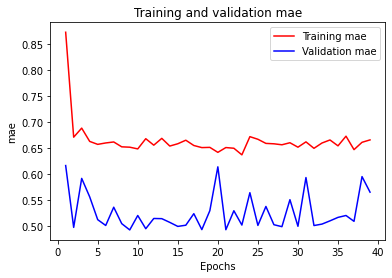

In [62]:
draw_graphics(fit_history)

In [64]:
model.load_weights('/content/drive/My Drive/LAB_1/best_weights.h5')

In [ ]:
model.save_weights('good_model.h5')

In [65]:
xPredictID = xPredict
xPredict = xPredict.drop(['Id'], axis=1)
mean = xPredict[xPredict.columns[~xPredict.columns.isin(['Big Cities','Other', 'DT', 'FC', 'IL', 'MB', '0', '1', '2', '3', '4', '5' ])]].mean(axis=0)
xPredict[xPredict.columns[~xPredict.columns.isin(['Big Cities','Other', 'DT', 'FC', 'IL', 'MB', '0', '1', '2', '3', '4', '5' ])]] -= mean


In [66]:
xPredict.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P10,P11,P12,P17,P19,P20,P21,P22,P23,P26,P27,P28,P29,P30,P31,P33,P35,P36,P37,OpenDays,Big Cities,Other,DT,FC,IL,MB,Istanbul,Ankara,Izmir,Antalya,Kocaeli,Other Cities
0,-3.08803,-0.428085,-0.215325,-0.396025,-0.98959,-0.8819,-0.30051,-0.931,-0.45897,1.68828,-2.06144,0.84312,-0.19112,0.42914,0.45762,-1.43038,0.36002,-1.279665,-1.16444,-1.233785,-0.084,-2.0833,-1.19333,-0.98743,-1.83283,-1.96889,-0.9735,-845.8428,0,1,0,1,0,0,-0.34087,-0.0872,-0.06465,-0.05911,-0.04364,0.60511
1,-1.08803,-0.428085,-0.215325,-0.396025,0.01041,-0.8819,-0.30051,-1.931,-1.45897,-1.31172,-1.06144,-1.15688,-0.19112,0.42914,0.45762,-0.43038,-2.63998,-1.279665,-1.16444,-2.233785,-0.084,-2.0833,-1.19333,-0.98743,-1.83283,-1.96889,-0.9735,-900.8428,0,1,0,0,1,0,-0.34087,-0.0872,-0.06465,-0.05911,-0.04364,0.60511
2,-1.08803,-0.428085,-0.215325,-0.396025,0.01041,-0.8819,-0.30051,-0.931,-0.45897,0.68828,-0.06144,-1.15688,-0.19112,0.42914,2.45762,2.56962,1.36002,-1.279665,-1.16444,-1.233785,-0.084,-2.0833,-1.19333,-0.98743,-1.83283,-1.96889,-0.9735,-1857.8428,1,0,0,1,0,0,-0.34087,0.9128,-0.06465,-0.05911,-0.04364,-0.39489
3,-2.08803,-0.428085,-0.215325,-0.396025,0.01041,0.1181,-0.30051,-0.931,-1.45897,-0.31172,-1.06144,-1.15688,-1.19112,-0.57086,0.45762,-0.43038,-1.63998,-1.279665,-1.16444,-1.233785,-0.084,-2.0833,2.80667,-0.98743,-1.83283,-1.96889,-0.9735,-1680.8428,0,1,0,0,1,0,-0.34087,-0.0872,-0.06465,-0.05911,0.95636,-0.39489
4,-2.08803,-0.428085,-0.215325,-0.396025,-0.98959,-0.8819,-0.30051,-0.931,-1.45897,-0.31172,-0.06144,-1.15688,-4.19112,0.42914,0.45762,-1.43038,-2.63998,-1.279665,-1.16444,1.766215,-0.084,-2.0833,-1.19333,-0.98743,-1.83283,-1.96889,-0.9735,-1766.8428,0,1,0,1,0,0,-0.34087,-0.0872,-0.06465,-0.05911,-0.04364,0.60511


In [67]:
yPredict = model.predict(xPredict)
yPredict *=std


In [68]:
yPredict

array([[2818933.5],
       [2818895.5],
       [2818586.8],
       ...,
       [2818615.2],
       [2818595.5],
       [2819193.8]], dtype=float32)

In [69]:
result = pd.DataFrame(yPredict)
result.insert(0, "Id", xPredictID['Id'], True)
result.rename(columns={0:'Prediction'}, inplace=True)
result.tail()

,Id,Prediction
99995,99995,2921222.50
99996,99996,2818725.75
99997,99997,2818615.25
99998,99998,2818595.50
99999,99999,2819193.75


In [70]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Prediction  100000 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 1.1 MB


In [71]:
result['Prediction'].mean()

2853755.25

In [73]:
df_train['revenue'].max()

19696939.0

In [74]:
df_train['revenue'].mean()

4453532.613138686

In [75]:
a = df_train['revenue'].mean()
b = result['Prediction'].mean()
c = a - b
print(c)

1599777.363138686


In [76]:
def describe(df, col):
  desc = df[col].describe()

  idx = desc.index.tolist()
  idx[5] = 'median'
  desc.index = idx
  return desc

In [77]:
describe(df_train, 'revenue')

count     1.370000e+02
mean      4.453533e+06
std       2.576072e+06
min       1.149870e+06
25%       2.999068e+06
median    3.939804e+06
75%       5.166635e+06
max       1.969694e+07
Name: revenue, dtype: float64

In [78]:
describe(result, 'Prediction')

count     1.000000e+05
mean      2.853755e+06
std       4.794646e+04
min       2.818571e+06
25%       2.818674e+06
median    2.819980e+06
75%       2.921042e+06
max       2.921223e+06
Name: Prediction, dtype: float64